In [3]:
# Count the frequency of unique values in the column
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

def get_original_handshapes():
    with open('../output/wlasl_800.json', 'r') as file:
        data = json.load(file)

    # Step 2 & 3: Process the data and save to a dictionary
    gloss_handshape_dict = {}
    for entry in data:
        gloss = entry['gloss']
        # Ensure there is at least one instance and it has the 'Handshape' key
        if entry['instances'] and 'Handshape' in entry['instances'][0]:
            handshape = entry['instances'][0]['Handshape']
            gloss_handshape_dict[gloss] = handshape

    print("Data has been processed and saved.")
    return  gloss_handshape_dict

hs_og = get_original_handshapes()

Data has been processed and saved.


In [19]:
hs = pd.DataFrame(hs_og.items(), columns=['Gloss', 'Handshape'])
hs['Handshape'] = hs['Handshape'].astype(str).str.strip()

hs_vs = hs.value_counts('Handshape').reset_index()

# Specify the path to your text file
file_path = '../output/gloss_handshape_pairs_kmeans.txt'

# Read the file into a DataFrame, assuming the separator is a comma
new_hs = pd.read_csv(file_path, sep=',', header=None, names=['Gloss', 'Handshape'])
new_hs['Handshape'] = new_hs['Handshape'].astype(str).str.strip()

# Display the DataFrame
new_hs_vs = new_hs.value_counts('Handshape').reset_index()



In [20]:
new_hs_vs

,Handshape,count
0,11,108
1,1,60
2,15,40
3,2,37
4,14,32
5,49,31
6,40,29
7,16,27
8,44,23
9,20,22


In [21]:


# Combine the two DataFrames into a single DataFrame
combined_df = pd.concat([hs_vs, new_hs_vs])

# Convert 'Handshape' to a categorical type to ensure consistent order across plots
hs_vs['Handshape'] = pd.Categorical(hs_vs['Handshape'], categories=pd.unique(hs_vs['Handshape']))
hs_vs['Handshape'] = hs_vs['Handshape'].replace('-1', 'Unlabeled')


new_hs_vs['Handshape'] = pd.Categorical(new_hs_vs['Handshape'], categories=pd.unique(new_hs_vs['Handshape']))
new_hs_vs['Handshape'] = new_hs_vs['Handshape'].replace('-1', 'Unlabeled')


In [22]:
new_hs_vs

,Handshape,count
0,11,108
1,1,60
2,15,40
3,2,37
4,14,32
5,49,31
6,40,29
7,16,27
8,44,23
9,20,22


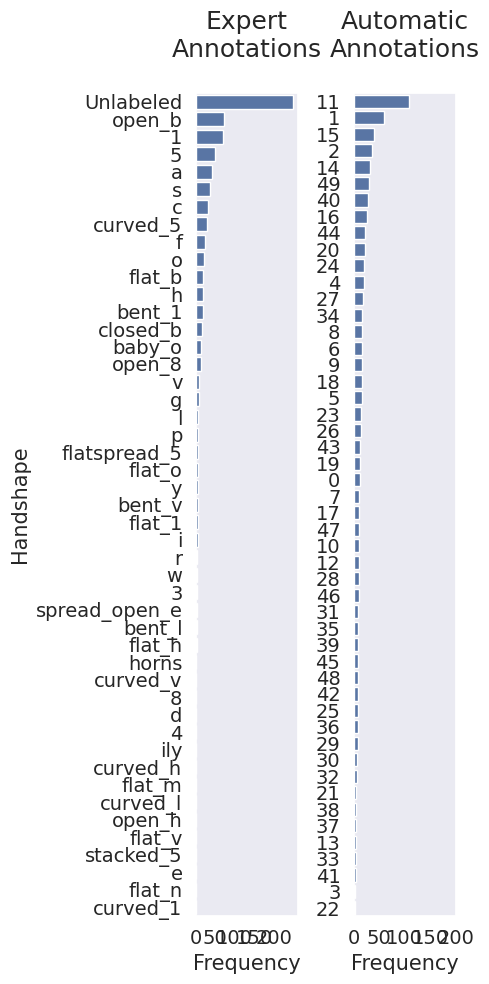

In [39]:
# Set the style
sns.set_style("dark")

# Create a subplot grid of 1 row x 2 columns, without sharing the y-axis
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5, 10))

# Plot the first barplot
sns.barplot(y='Handshape', x='count', data=hs_vs, ax=axs[0])
axs[0].set_ylabel('Handshape', size=15)
axs[0].set_xlabel('Frequency', size=15)
axs[0].set_title('Expert\nAnnotations\n', size=18)
axs[0].tick_params(axis='x', labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)
axs[0].set_xticks(range(0, 201, 50))  # Sets x-ticks for the first subplot


# Plot the second barplot
sns.barplot(y='Handshape', x='count', data=new_hs_vs, ax=axs[1])
axs[1].set_ylabel('', size=15)  # Setting y-label since they are not shared
axs[1].set_xlabel('Frequency', size=15)
axs[1].set_title('Automatic\nAnnotations\n', size=18)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].set_xticks(range(0, 201, 50))  # Sets x-ticks for the first subplot

# axs[1].tick_params(axis='y', labelsize=10) # Not needed due to sharey=True

plt.tight_layout()  # Adjust layout to make room for the plots
plt.show()

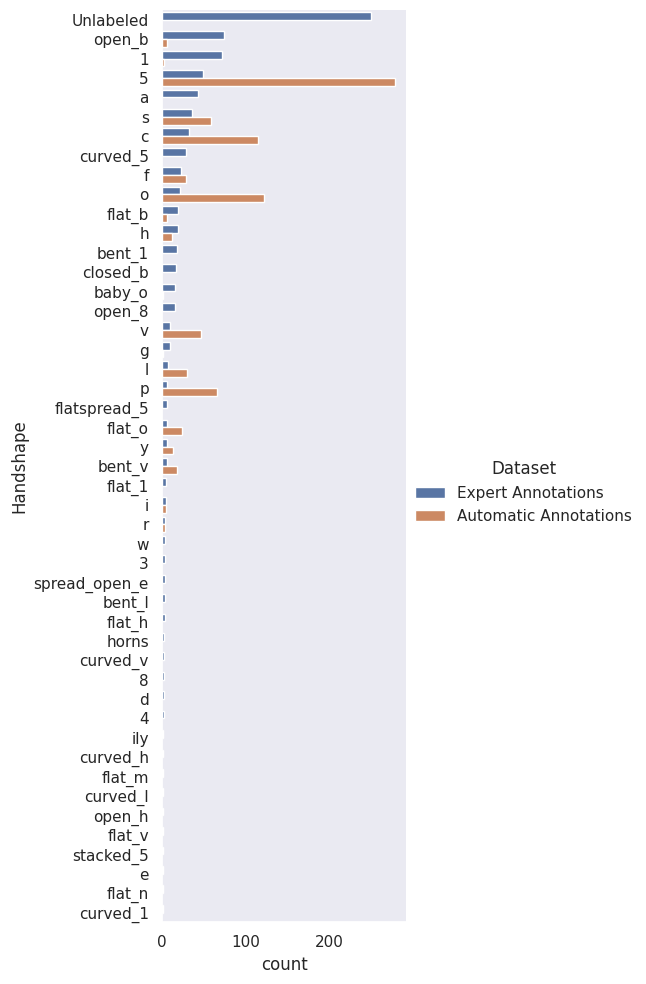

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="dark")

# Draw a nested barplot by species and sex
sns.catplot(
    data=combined_df, kind="bar",
    x="count", y="Handshape",hue="Dataset",
 height=10, aspect=0.5  # Adjust the figure size: height=6 inches, aspect ratio=1.5
)

plt.show()
